# 🎧 EDA & Data Cleaning — Spotify

## 🧹 Data Cleaning  
Cleansing data sebelum digunakan untuk pemodelan:

- **Missing values:** identifikasi jumlah missing value dan persentasenya, lalu tentukan apakah akan dihapus atau diimputasi. 
- **Duplicates:** menemukan baris duplikat dan menentukan apakah akan dihapus atau digunakan.  
- **Shape check:** untuk mengetahui jumlah baris dan kolom dari data.  

---

## 📊 EDA (Exploratory Data Analysis)
Ringkasan Statistik dan deteksi outlier:

- **Numerical description:** `df.describe()` untuk mengetahui mean, std, min/max, quantiles.  
- **Outlier detection:** menggunakan IQR atau grafik boxplots untuk menandai nilai ekstrem.  
- **Missing & duplicates report:** Hasil EDA.  

---

## 🎨 Visualisasi  
Visualisasi untuk menggambarkan karakteristik dataset:


- **Histograms & density plots** untuk melihat distribusi fitur numerik. 
- **Boxplots** untuk menampilkan outlier.   
- **Bar / pie charts** untuk kategori.  
- **Heatmap** untuk melihat korelasi antar fitur (jika relevan).

---



## Library yang digunakan

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




import warnings
warnings.filterwarnings("ignore")

print('done ')

done 


## Data Handling

In [2]:
# Membaca file
df=pd.read_csv('E:/Portofolio/Dataset/spotify_churn_dataset.csv')
# Menampilkan 2 baris pertama dari data
df.head(2)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


**df.info()** digunakan untuk:

- Mengetahui kolom mana yang memiliki missing values.
- Mengetahui tipe data sebelum dilakukan analisis lebih lanjut
- Memastikan ukuran dataset tidak terlalu besar untuk diolah di memori.

In [4]:
# Missing value dari data
print(f"Missing Value :\n{df.isnull().sum()}")

# Nilai duplikat
print(f'\nNilai duplikat :\n {df.duplicated().sum()}')

# Jumlah baris dan kolom
print (f'\nJumlah baris dan kolom :\nJumlah baris sebanyak {df.shape[0]} \nJumlah kolom sebanyak {df.shape[1]}')

Missing Value :
user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

Nilai duplikat :
 0

Jumlah baris dan kolom :
Jumlah baris sebanyak 8000 
Jumlah kolom sebanyak 12


Dari informasi di atas dapat disimpulkan bahwa **tidak terdapat missing values untuk setiap variabel dan tidak terdapat nilai duplikat**. Adapun ukuran dataframe yang dimiliki yaitu terdiri dari **8.000 baris** dan **12 kolom**.

In [5]:
# Menampilkan nama kolom
df.columns

Index(['user_id', 'gender', 'age', 'country', 'subscription_type',
       'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

**Mengubah nama kolom ke versi Bahasa Indonesia**

In [6]:
df.rename(columns={
    'user_id': 'id_pengguna',
    'gender': 'jenis_kelamin',
    'age': 'usia',
    'country': 'negara',
    'subscription_type': 'tipe_langganan',
    'listening_time': 'waktu_mendengarkan',
    'songs_played_per_day': 'lagu_diputar_per_hari',
    'skip_rate': 'tingkat_lewati_lagu',
    'device_type': 'jenis_perangkat',
    'ads_listened_per_week': 'iklan_didengar_per_minggu',
    'offline_listening': 'mendengarkan_offline',
    'is_churned': 'status_berhenti'
}, inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_pengguna,8000.0,4000.500000,2309.545410,1.0,2000.75,4000.5,6000.25,8000.0
usia,8000.0,37.662125,12.740359,16.0,26.00,38.0,49.00,59.0
waktu_mendengarkan,8000.0,154.068250,84.015596,10.0,81.00,154.0,227.00,299.0
lagu_diputar_per_hari,8000.0,50.127250,28.449762,1.0,25.00,50.0,75.00,99.0
tingkat_lewati_lagu,8000.0,0.300127,0.173594,0.0,0.15,0.3,0.45,0.6
iklan_didengar_per_minggu,8000.0,6.943875,13.617953,0.0,0.00,0.0,5.00,49.0
mendengarkan_offline,8000.0,0.747750,0.434331,0.0,0.00,1.0,1.00,1.0
status_berhenti,8000.0,0.258875,0.438044,0.0,0.00,0.0,1.00,1.0


Fungsi **df.describe** digunakan untuk memberikan gambaran cepat tentang distribusi data numerik seperti rata-rata, sebaran, dan rentang nilai, agar kita bisa memahami pola dasar dataset tanpa perlu menghitung satu per satu.

## Data Analysis

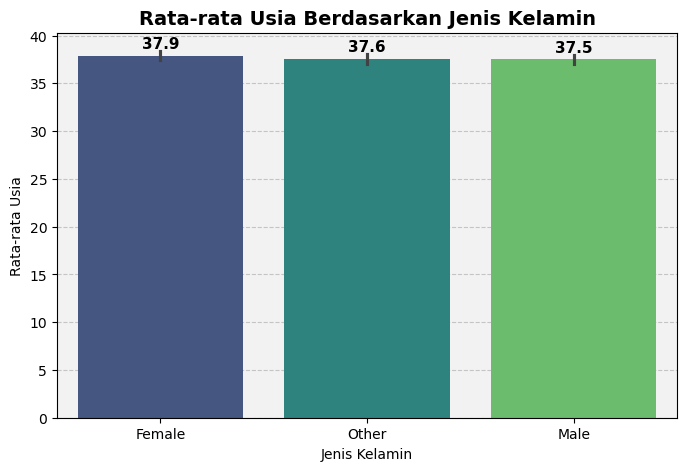

In [8]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x='jenis_kelamin', y='usia', estimator='mean', palette='viridis')

# Background grafik menjadi abu-abu muda
ax.set_facecolor('#f2f2f2')  # atau '#eaeaea'

# Pastikan grid di belakang grafik
ax.set_axisbelow(True)

# Tambahkan nilai rata-rata di atas tiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3,
                 fontsize=11, color='black', weight='bold')

plt.title('Rata-rata Usia Berdasarkan Jenis Kelamin', fontsize=14, weight='bold')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Usia')

# Grid lebih soft dan di belakang bar
plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray')

plt.show()


Berdasarkan visualisasi di atas dapat disimpulkan beberapa informasi sebagai berikut:
- Rata-rata usia perempuan adalah 37.9 tahun.
- Rata-rata usia laki-laki adalah 37.5 tahun.
- Rata-rata usia kategori other adalah 37.6 tahun.

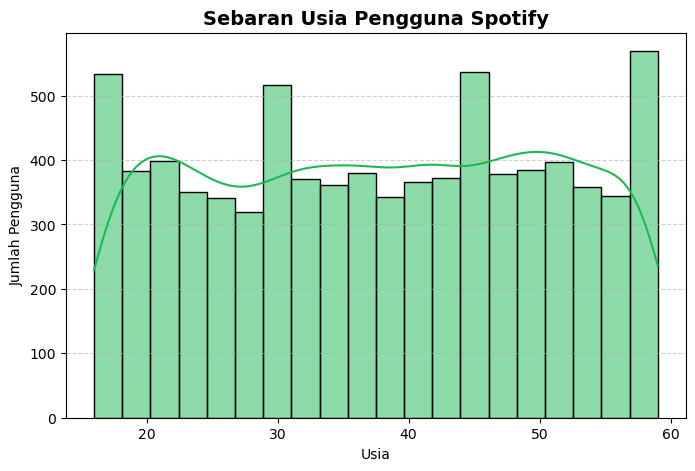

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='usia', bins=20, kde=True, color='#1DB954')

plt.title('Sebaran Usia Pengguna Spotify', fontsize=14, weight='bold')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

📊 Kesimpulan:

**1. Distribusi usia relatif merata**

Grafik menunjukkan bahwa jumlah pengguna di setiap rentang usia tidak berbeda jauh. Tidak ada puncak yang terlalu menonjol — artinya Spotify digunakan oleh berbagai kelompok umur secara seimbang.

**2. Sedikit peningkatan pada usia muda dan paruh baya**

Terlihat ada sedikit peningkatan jumlah pengguna pada kelompok usia sekitar 18–25 tahun dan 45–55 tahun, yang mungkin menunjukkan dua kelompok utama pengguna aktif Spotify:

- Pengguna muda (remaja hingga dewasa muda)

- Pengguna dewasa menengah

**3. Kurva kepadatan (KDE) tampak relatif datar**

Menegaskan bahwa distribusi usia tidak terpusat pada rentang tertentu, melainkan menyebar cukup luas di semua umur.

**4. Rentang usia pengguna cukup lebar (sekitar 15–60 tahun)**

Menunjukkan bahwa Spotify menjangkau berbagai demografi, dari pengguna muda hingga dewasa.

## Numerical analysis 

In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['id_pengguna', 'usia', 'waktu_mendengarkan', 'lagu_diputar_per_hari',
       'tingkat_lewati_lagu', 'iklan_didengar_per_minggu',
       'mendengarkan_offline', 'status_berhenti'],
      dtype='object')


## Outlier

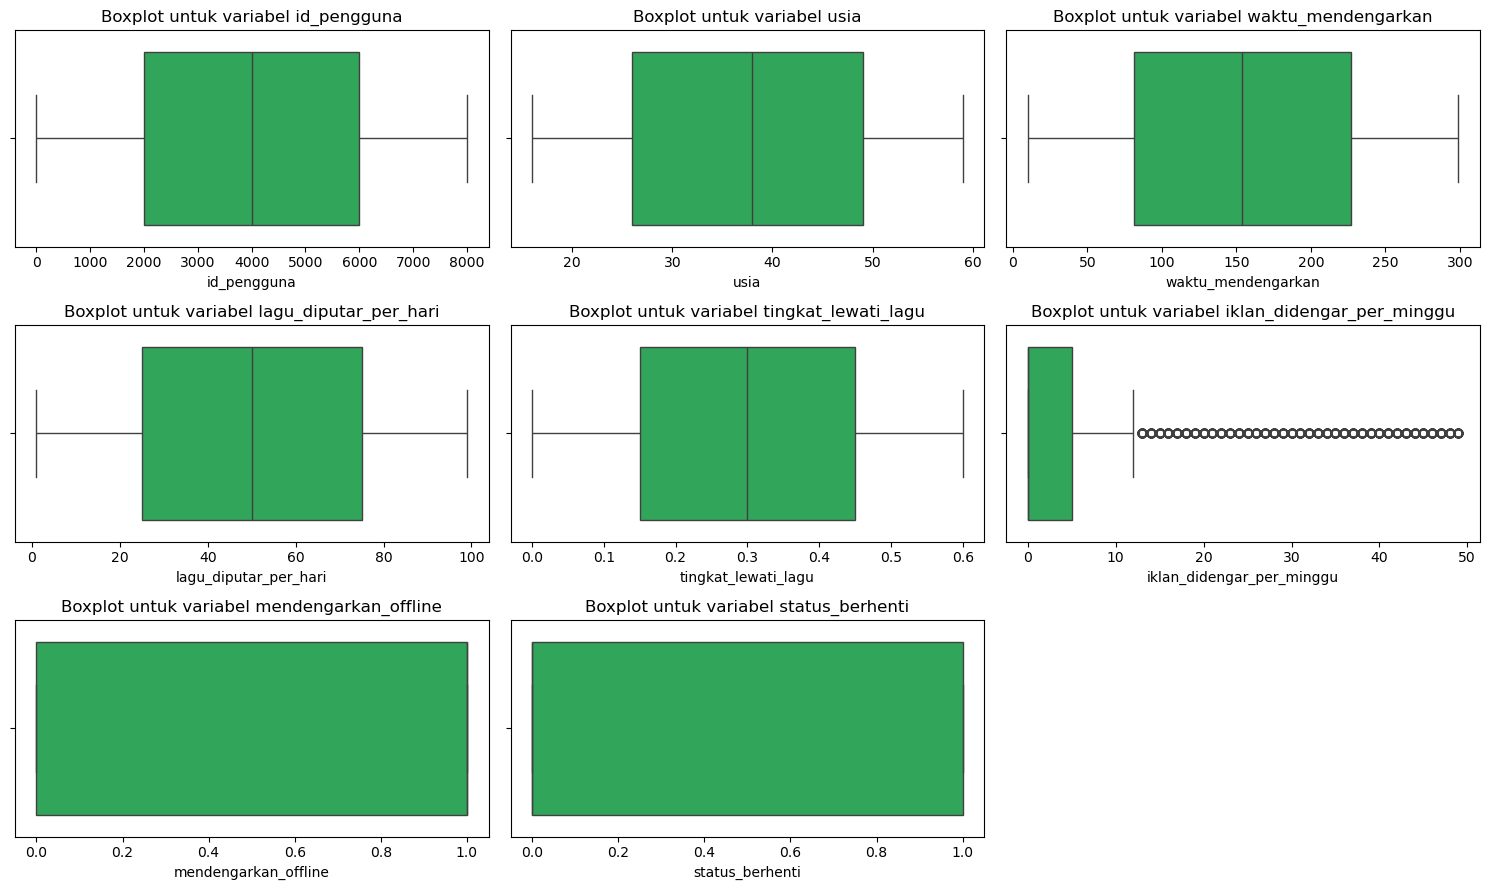

In [11]:
num_plots = len(numerical_cols)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 3 * nrows))

if nrows == 1 and ncols > 1:
    axes = axes.flatten()
elif nrows > 1:
    axes = axes.flatten()
elif nrows == 1 and ncols == 1:
    axes = [axes] 

spotify_green = '#1DB954'

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color=spotify_green) 
    
    axes[i].set_title(f'Boxplot untuk variabel {col}', fontsize=12)
    axes[i].set_ylabel('')

for j in range(num_plots, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

**Kesimpulan dari Boxplot:**

**id_pengguna**
Distribusi nilai id_pengguna cukup merata tanpa outlier, karena ini mungkin hanya ID unik yang berurutan.

**usia**
Usia pengguna mayoritas berada di kisaran 25 sampai 50 tahun dengan rentang antara sekitar 16 sampai 59 tahun, tanpa outlier yang ekstrem.

**waktu_mendengarkan**
Waktu mendengarkan (menit per hari atau jam per minggu) tersebar cukup merata, tanpa outlier signifikan.

**lagu_diputar_per_hari**
Jumlah lagu yang diputar per hari berkisar dari 0 sampai 100, distribusinya cukup merata tanpa outlier.

**tingkat_lewati_lagu**
Proporsi lagu yang dilewati berada di bawah 0.6 (60%), tanpa outlier yang ekstrem.

**iklan_didengar_per_minggu**
Variabel ini memiliki outlier jelas di sisi kanan (nilai yang jauh lebih tinggi dari mayoritas data), menunjukkan beberapa pengguna mendengar iklan sangat banyak dalam seminggu.

**mendengarkan_offline**
Variabel ini kemungkinan adalah biner (0 atau 1), distribusinya hanya dua nilai tersebut, tanpa outlier.

**status_berhenti**
Variabel ini juga biner (0 atau 1), menunjukkan apakah pengguna berhenti berlangganan atau tidak, tanpa outlier.

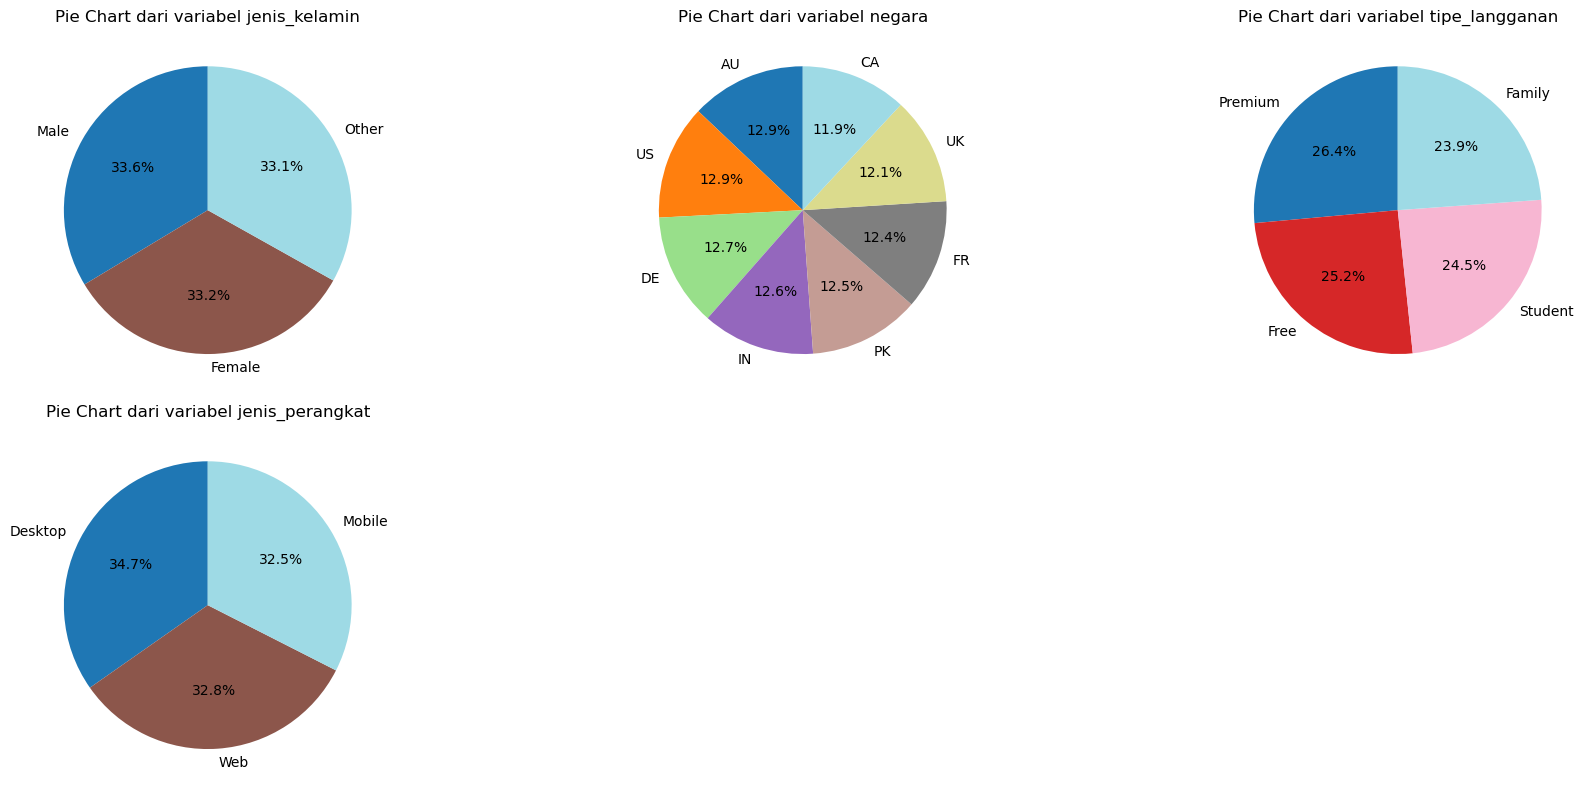

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
    plt.title(f'Pie Chart dari variabel {col}')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

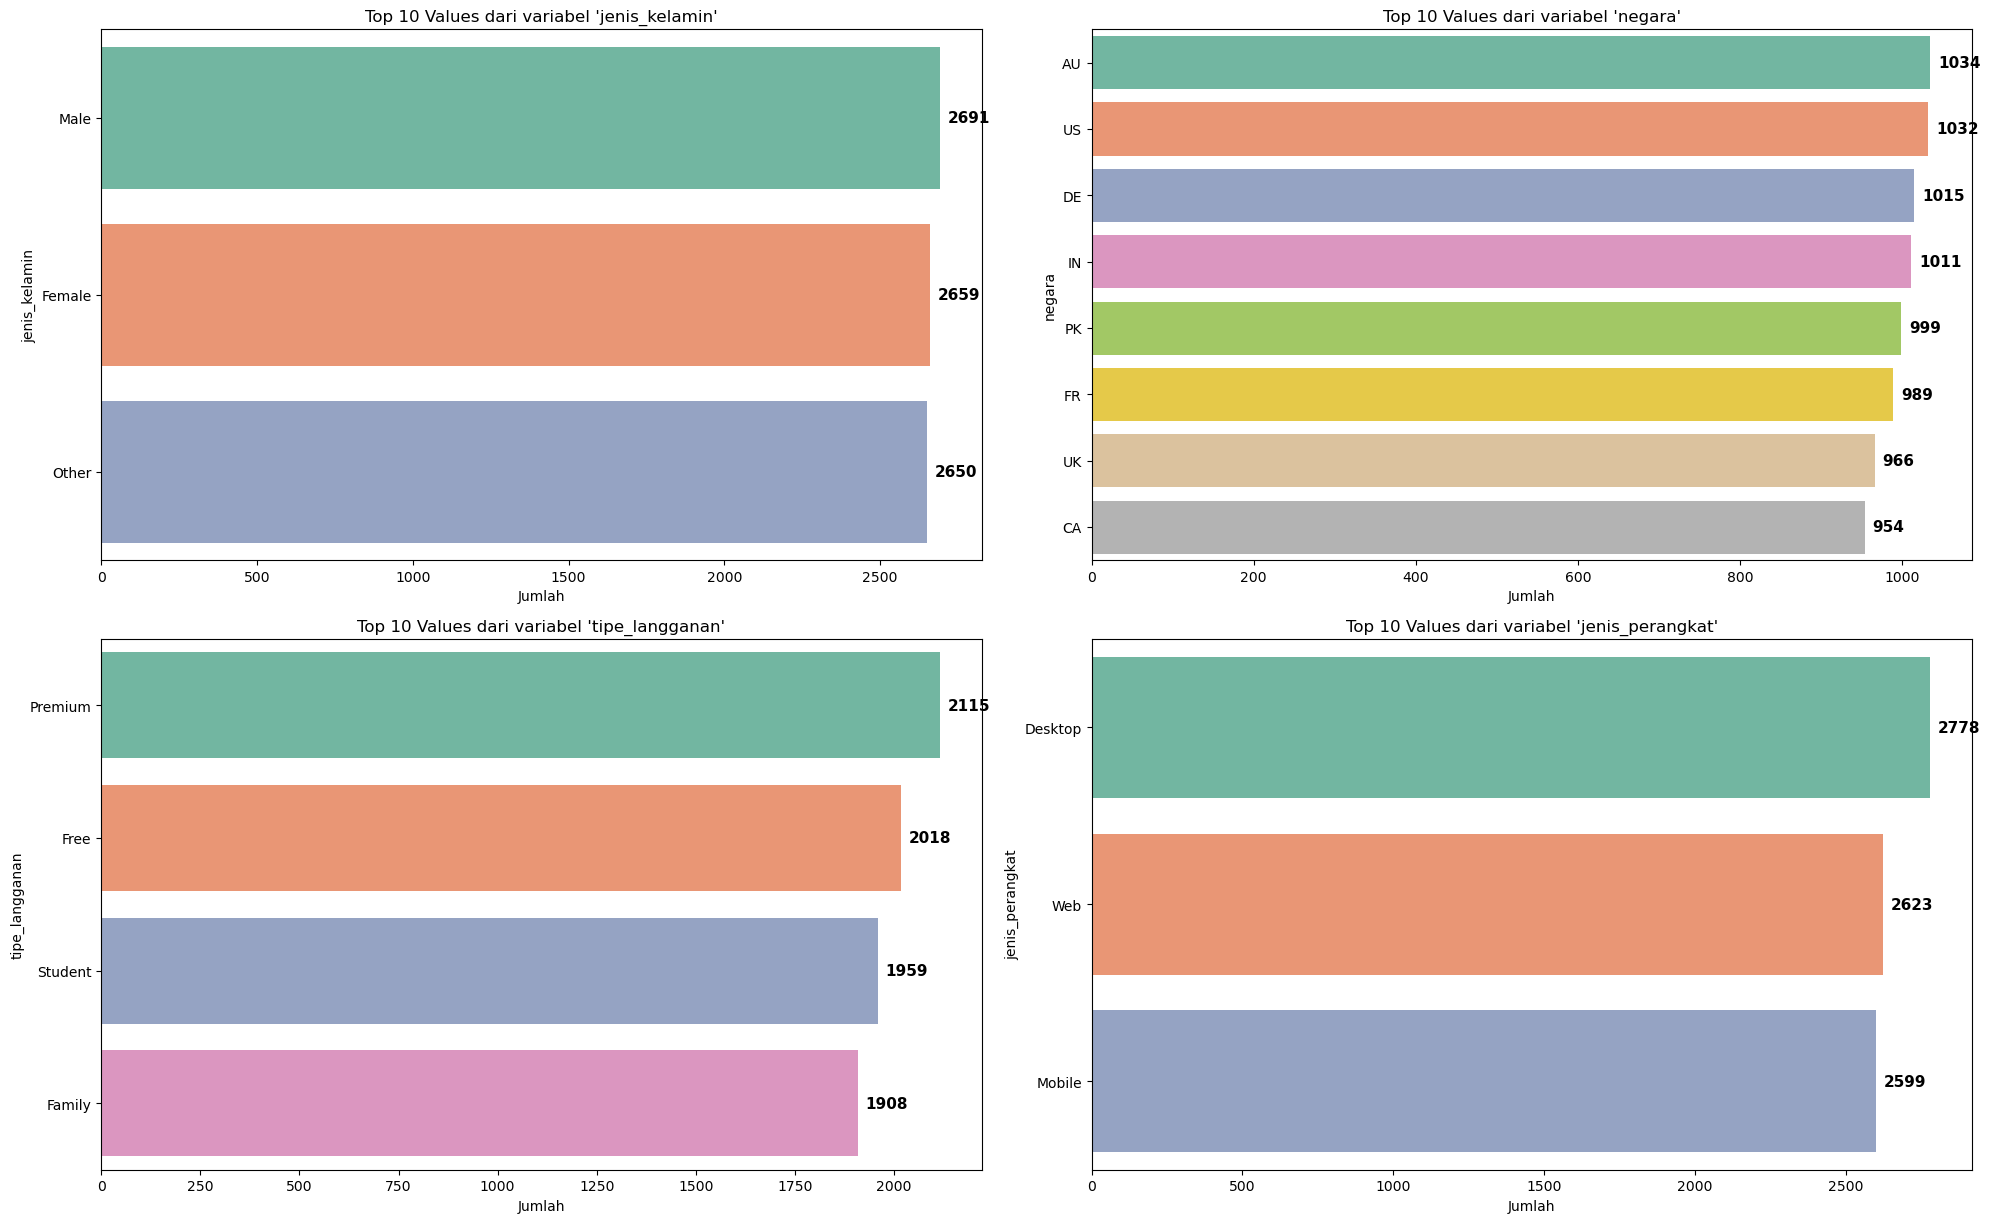

In [13]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    top_values = df[col].value_counts().nlargest(10)

    ax = sns.barplot(
        y=top_values.index,
        x=top_values.values,
        palette='Set2'
    )

    # --- Tambahkan angka di ujung bar ---
    for y_pos, value in enumerate(top_values.values):
        ax.text(
            value + (value*0.01),   # posisi X sedikit ke kanan
            y_pos,                  # posisi Y sejajar bar
            f"{value}",             # teks angka
            va='center',
            ha='left',
            fontsize=11,
            weight='bold',
            color='black'
        )

    plt.title(f"Top 10 Values dari variabel '{col}'", fontsize=12)
    plt.xlabel("Jumlah")
    plt.ylabel(col)

    plt.tight_layout()


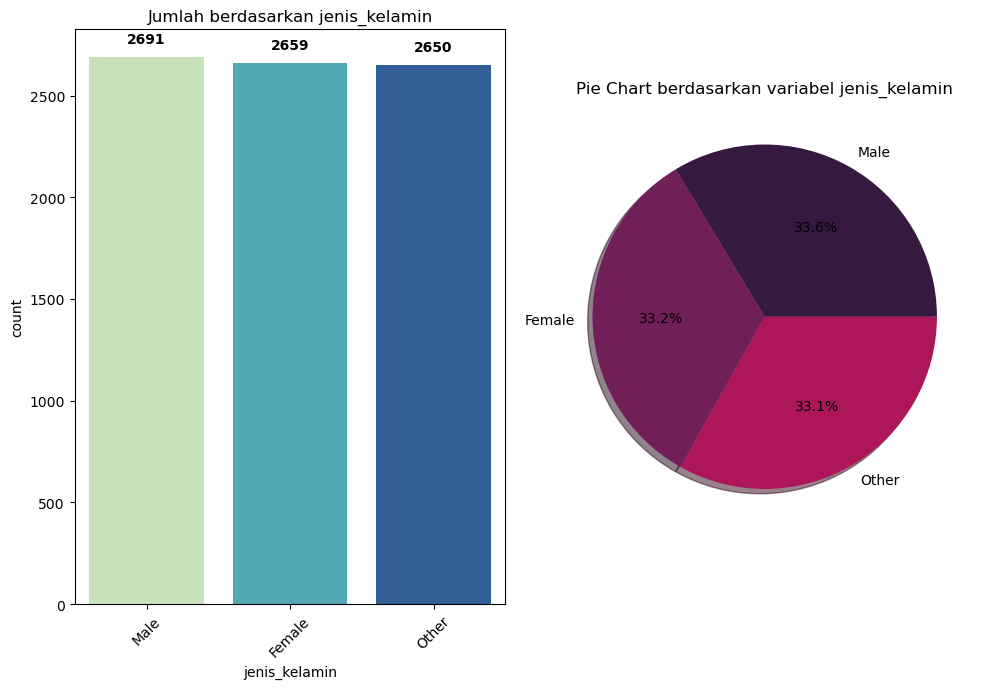

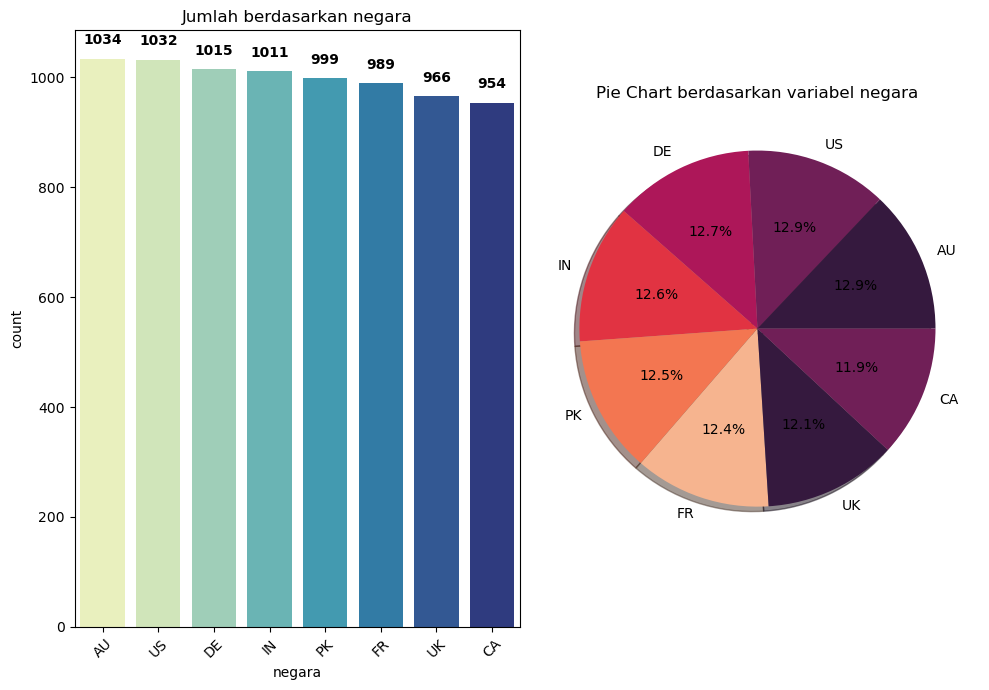

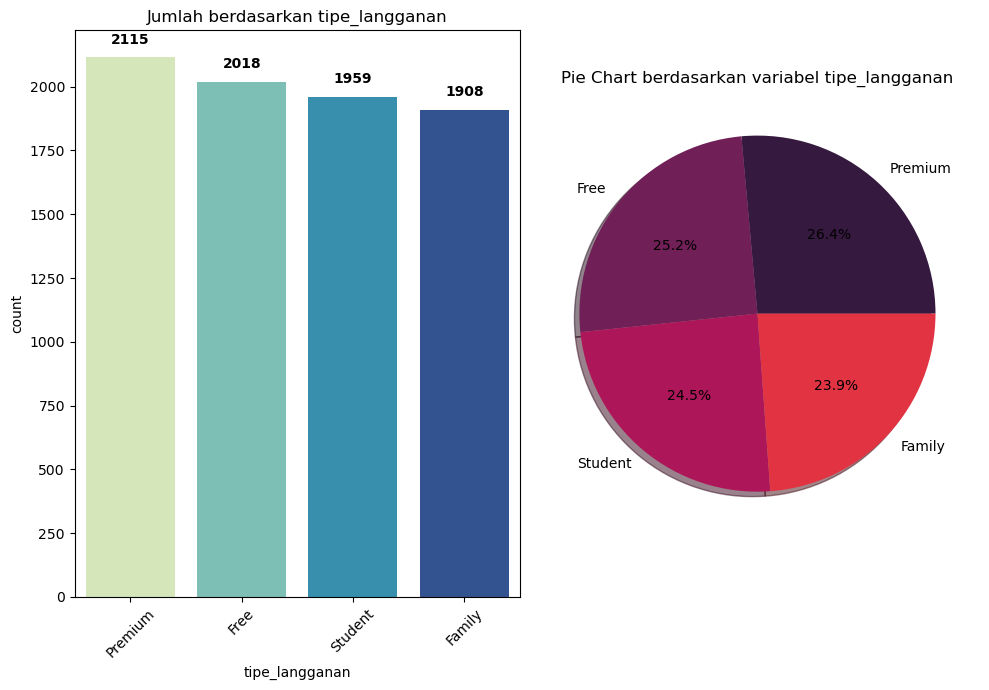

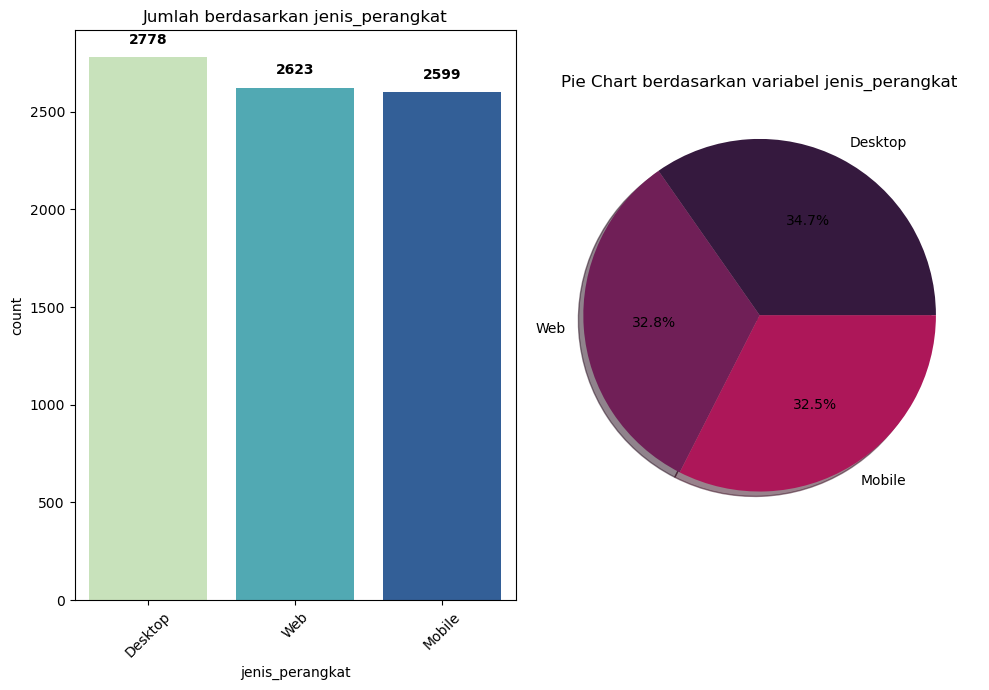

In [14]:
# Bar and Pie Charts
for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10,7))
    
    # Bar chart
    ax = sns.countplot(
        data=df, 
        x=col, 
        order=df[col].value_counts().index, 
        ax=axes[0], 
        palette='YlGnBu'
    )
    axes[0].set_title(f'Jumlah berdasarkan {col}')
    axes[0].tick_params(axis='x', rotation=45)
    
    # ------ Tambahkan angka di atas setiap bar ------
    for p in ax.patches:
        count = int(p.get_height())     # nilai count
        x = p.get_x() + p.get_width() / 2   # posisi tengah bar
        y = p.get_height()                  # tinggi bar
        ax.text(
            x, y + (0.02 * max(df[col].value_counts())), 
            count,
            ha='center', va='bottom',
            fontsize=10, weight='bold'
        )

    # Pie chart
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        ax=axes[1],
        colors=sns.color_palette('rocket'),
        shadow=True
    )
    axes[1].set_title(f'Pie Chart berdasarkan variabel {col}')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()


## Target Balance


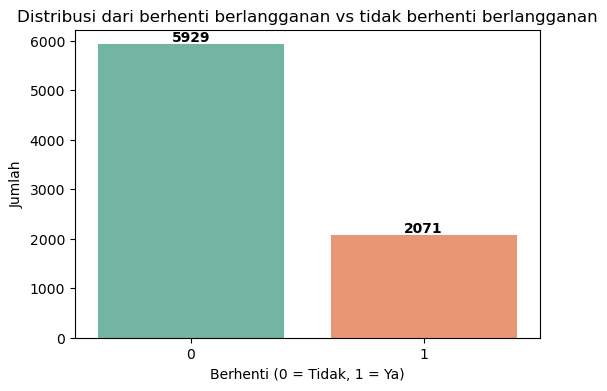

In [15]:
plt.figure(figsize=(6,4))
tes = sns.countplot(x="status_berhenti", data=df, palette="Set2")
for p in tes.patches:
        count = int(p.get_height())     # nilai count
        x = p.get_x() + p.get_width() / 2   # posisi tengah bar
        y = p.get_height()                  # tinggi bar
        tes.text(
            x, y + (0.0002 * max(df['status_berhenti'].value_counts())), 
            count,
            ha='center', va='bottom',
            fontsize=10, weight='bold'
        )
plt.title("Distribusi dari berhenti berlangganan vs tidak berhenti berlangganan")
plt.xlabel("Berhenti (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()


In [16]:
#show %
churn_rate = df["status_berhenti"].value_counts(normalize=True) * 100
print("Rate berhenti (%):")
print(churn_rate)

Rate berhenti (%):
status_berhenti
0    74.1125
1    25.8875
Name: proportion, dtype: float64


## 🔎 Tujuan: Mengetahui perbedaan distribusi antara pelanggan yang berhenti berlangganan (churn) dan yang tidak berhenti berlangganan untuk setiap fitur

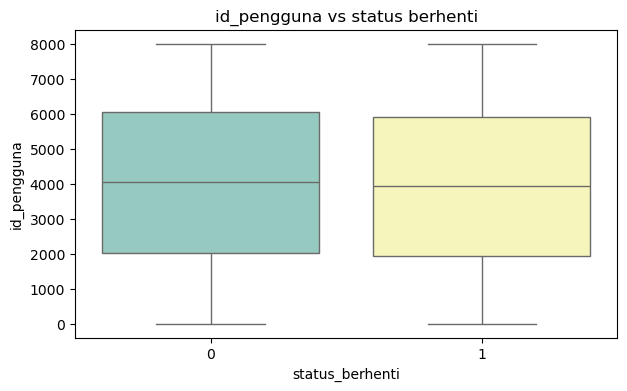

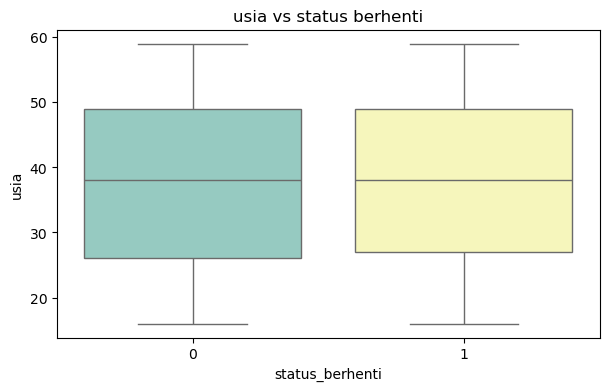

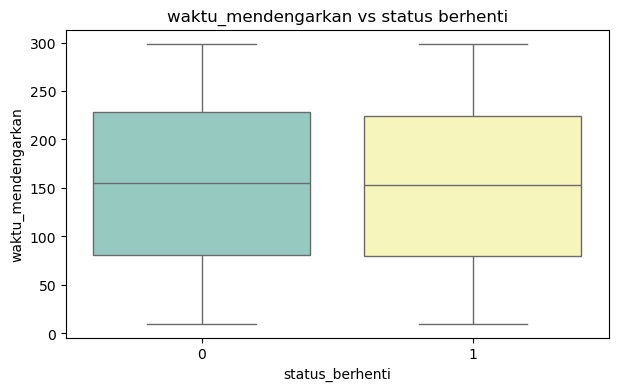

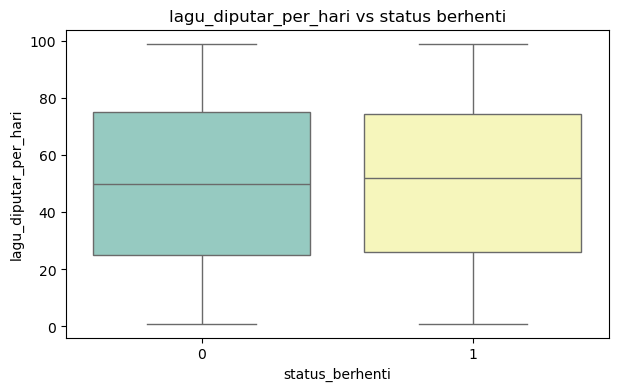

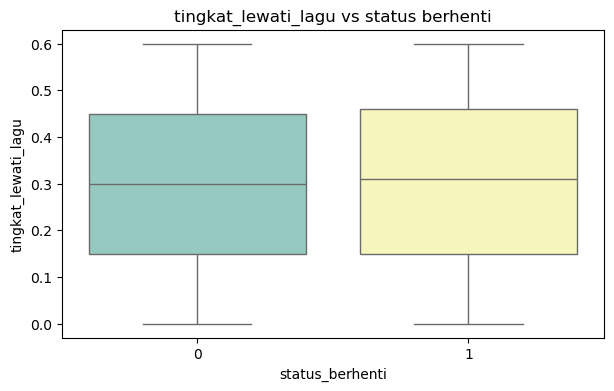

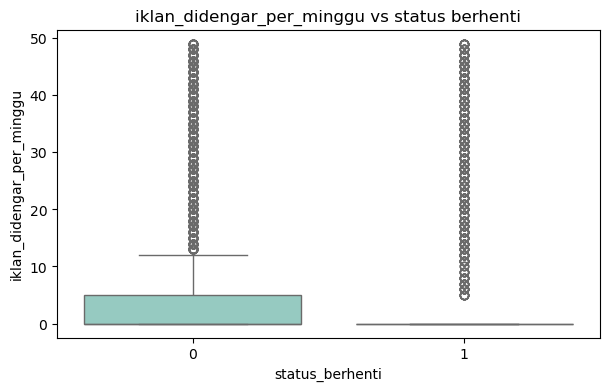

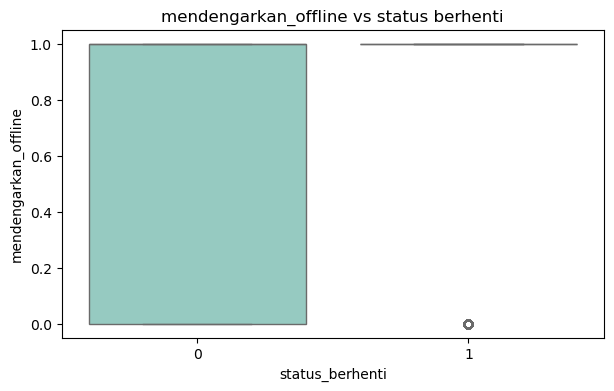

In [17]:
num_features = df.select_dtypes(include=['int64','float64']).columns.drop("status_berhenti")

for col in num_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(x="status_berhenti", y=col, data=df, palette="Set3")
    plt.title(f"{col} vs status berhenti")
    plt.show()


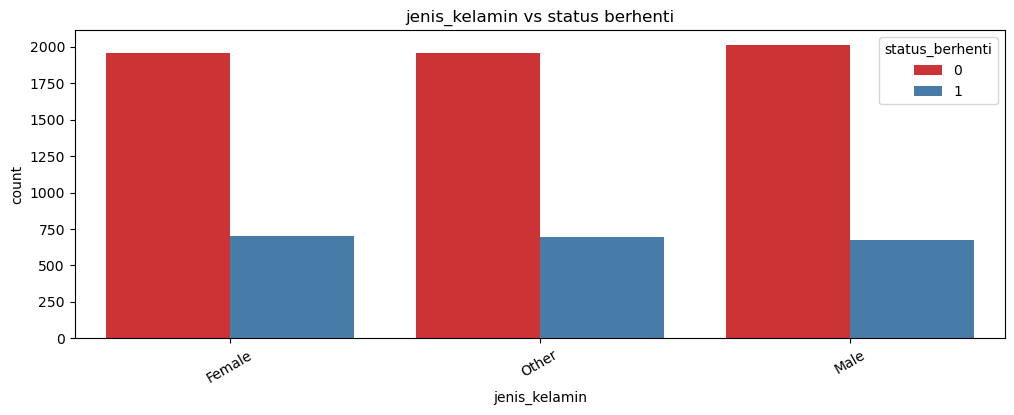

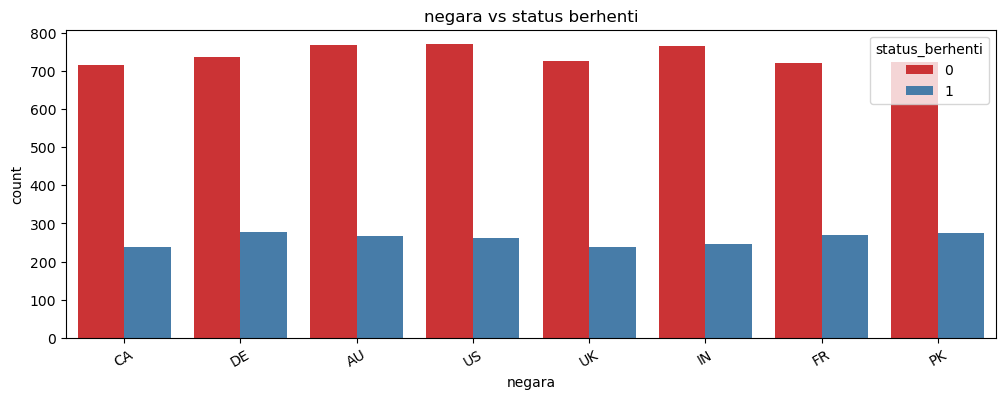

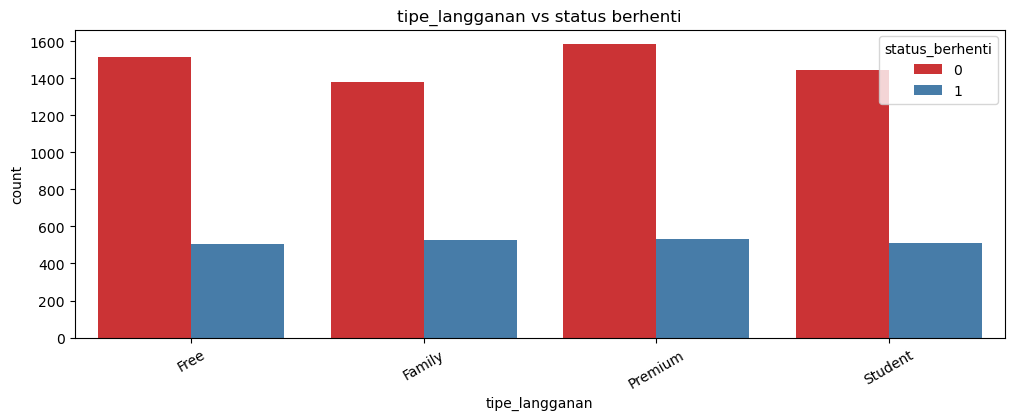

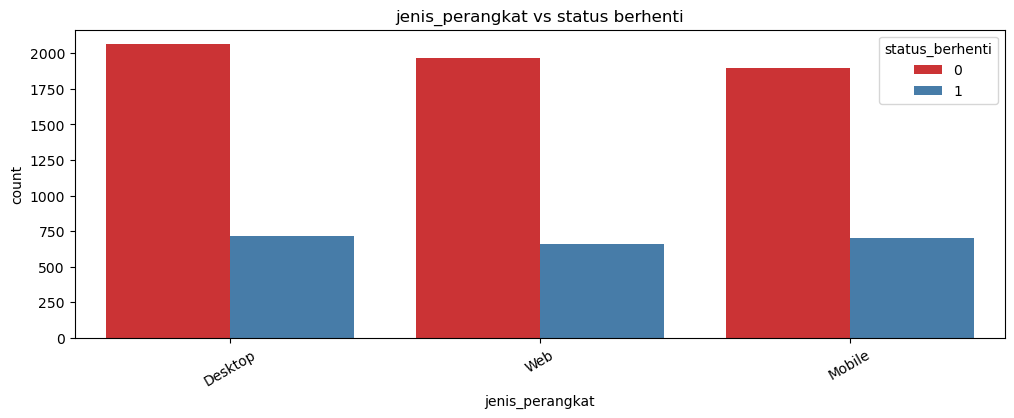

In [18]:
cat_features = df.select_dtypes(include=['object']).columns

for col in cat_features:
    plt.figure(figsize=(12,4))
    sns.countplot(x=col, hue="status_berhenti", data=df, palette="Set1")
    plt.title(f"{col} vs status berhenti")
    plt.xticks(rotation=30)
    plt.show()


## 🔎 Tujuan: Untuk mengetahui apakah perbedaan yang terlihat pada grafik tersebut signifikan secara statistik atau tidak.

In [19]:
for col in cat_features:
    contingency = pd.crosstab(df[col], df["status_berhenti"])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col}: p-value = {p}")


jenis_kelamin: p-value = 0.6004606500958493
negara: p-value = 0.5448581401010985
tipe_langganan: p-value = 0.216110972429786
jenis_perangkat: p-value = 0.30549848123857454


## 📌 Kesimpulan:

Semua fitur yang diuji memiliki p-value > 0.05, artinya tidak ada perbedaan yang signifikan secara statistik antara pelanggan yang berhenti berlangganan (churn) dan yang tidak berhenti berlangganan (non-churn) untuk fitur-fitur tersebut. Dengan kata lain, perbedaan yang terlihat di grafik kemungkinan hanya kebetulan dan tidak cukup kuat untuk disimpulkan secara statistik.

## Pro Analysis

In [49]:
num_features = df.select_dtypes(include=['int64','float64']).columns.drop("status_berhenti")

for col in num_features:
    churned = df[df["status_berhenti"]==1][col].dropna()
    non_churned = df[df["status_berhenti"]==0][col].dropna()
    t, p = ttest_ind(churned, non_churned, equal_var=False)
    print(f"{col}: p-value = {p}")


id_pengguna: p-value = 0.14933857688676888
usia: p-value = 0.7209312290600904
waktu_mendengarkan: p-value = 0.492440207283827
lagu_diputar_per_hari: p-value = 0.40397409604615586
tingkat_lewati_lagu: p-value = 0.15051626043748986
iklan_didengar_per_minggu: p-value = 0.8392877293733654
mendengarkan_offline: p-value = 0.25022737880302104


## 📌 Basic conclusion:

Semua fitur yang diuji memiliki p-value > 0.05, artinya tidak ada perbedaan yang signifikan secara statistik antara pelanggan yang berhenti berlangganan (churn) dan yang tidak berhenti berlangganan (non-churn) untuk fitur-fitur ini. Dengan kata lain, perbedaan yang terlihat pada grafik kemungkinan besar hanya kebetulan dan tidak cukup kuat untuk disimpulkan secara statistik.

Hal ini wajar dalam Analisis Churn Pelanggan karena perilaku pelanggan bergantung pada kombinasi fitur, bukan hanya pada satu fitur saja.

## Analisis Multivariat
## Fitur/Variabel Penting

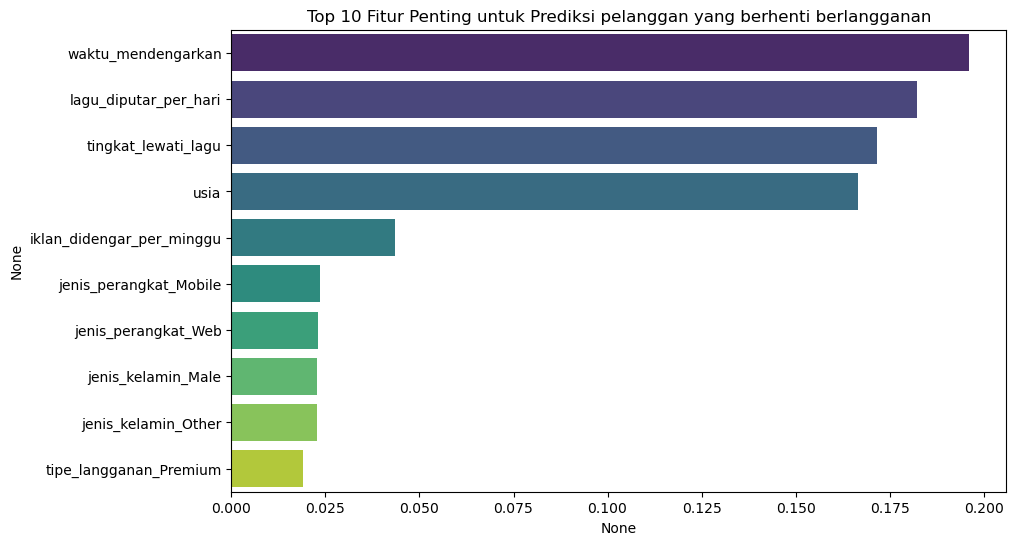

In [21]:
X = df.drop(columns=["status_berhenti", "id_pengguna"]) 
y = df["status_berhenti"]

X = pd.get_dummies(X, drop_first=True)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette="viridis")
plt.title("Top 10 Fitur Penting untuk Prediksi pelanggan yang berhenti berlangganan")
plt.show()


# Analisis Top 10 Fitur Penting untuk Prediksi Pelanggan yang Berhenti Berlangganan

## Ringkasan Grafik

1. **Fitur Paling Penting**
   - `waktu_mendengarkan` adalah fitur dengan kontribusi terbesar dalam memprediksi pelanggan yang berhenti berlangganan. Durasi waktu mendengarkan sangat memengaruhi kemungkinan churn.

2. **Fitur Penting Berikutnya**
   - `lagu_diputar_per_hari`: Jumlah lagu yang diputar per hari menjadi indikator utama perilaku churn.
   - `tingkat_lewati_lagu`: Tingkat pelanggan melewati lagu menunjukkan perilaku yang berpengaruh terhadap churn.
   - `usia`: Faktor usia juga memengaruhi prediksi berhenti berlangganan.

3. **Fitur dengan Kontribusi Lebih Rendah**
   - `iklan_didengar_per_minggu` memiliki kontribusi yang lebih kecil.
   - `jenis_perangkat_Mobile` dan `jenis_perangkat_Web` berkontribusi kecil, menunjukkan perangkat kurang berpengaruh langsung.
   - `jenis_kelamin_Male` dan `jenis_kelamin_Other` juga berkontribusi rendah.
   - `tipe_langganan_Premium` memiliki pengaruh paling kecil di antara 10 fitur teratas.

## Interpretasi

- Model lebih mengandalkan **perilaku penggunaan layanan** (waktu mendengarkan, jumlah lagu, melewati lagu) dan **usia** dibandingkan atribut demografis sederhana seperti jenis kelamin atau jenis perangkat.
- Ini sesuai dengan fakta bahwa churn biasanya dipengaruhi oleh interaksi pengguna dengan produk, bukan hanya karakteristik demografis.

## Kesimpulan

Untuk mengurangi churn, fokus strategi sebaiknya pada peningkatan pengalaman pengguna berdasarkan perilaku mereka, seperti meningkatkan waktu mendengarkan dan kepuasan terhadap lagu yang diputar. Pendekatan personalisasi yang berbasis perilaku akan lebih efektif dibandingkan hanya mengandalkan data demografi atau perangkat.



## Accuracy

In [22]:
y_pred = rf.predict(X_test)

print("✅ Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation
Accuracy: 0.749375

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.86      1200
           1       0.47      0.02      0.04       400

    accuracy                           0.75      1600
   macro avg       0.61      0.51      0.45      1600
weighted avg       0.68      0.75      0.65      1600



# Evaluasi Model Random Forest untuk Prediksi Churn

## Hasil Evaluasi

- **Akurasi:** 0.75 (75%)  
  Model berhasil mengklasifikasikan dengan benar 75% data uji secara keseluruhan.

### Performa per Kelas

| Kelas | Precision | Recall | F1-Score | Interpretasi |
|-------|-----------|--------|----------|--------------|
| 0 (Tidak Berhenti) | 0.75      | 0.99   | 0.86     | Model sangat baik mengenali pelanggan yang tidak berhenti (sedikit sekali false negative). |
| 1 (Berhenti)       | 0.47      | 0.02   | 0.04     | Model kurang efektif mendeteksi pelanggan yang berhenti, banyak false negative. |

### Rata-rata Metrik

| Metrik       | Nilai |
|--------------|--------|
| Macro Avg F1 | 0.45   |
| Weighted Avg F1 | 0.65 |

---

## Interpretasi

- Model cenderung **mengutamakan klasifikasi kelas mayoritas** (pelanggan yang tidak berhenti) sehingga memiliki recall sangat tinggi untuk kelas 0.
- Namun, model **kesulitan mengenali pelanggan churn (kelas 1)**, ditandai dengan recall dan F1-score yang sangat rendah pada kelas ini.
- Hal ini kemungkinan besar disebabkan oleh **ketidakseimbangan data** antara kelas pelanggan berhenti dan tidak berhenti.

## Rekomendasi

- Terapkan teknik **penanganan imbalance data** seperti oversampling (misal SMOTE), undersampling, atau pemberian bobot kelas agar model lebih peka terhadap churn.
- Lakukan tuning model atau coba algoritma lain yang dapat meningkatkan recall dan precision khususnya pada kelas churn.
- Gunakan metrik tambahan seperti **AUC-ROC** untuk evaluasi performa yang lebih menyeluruh.

